## Unzip The Data

In [2]:
!unzip 'IMDB Dataset.csv.zip'

Archive:  IMDB Dataset.csv.zip
  inflating: IMDB Dataset.csv        


## Import Libraries

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
training_size = 30000
vocabs_size = 10000
embedding_dim = 16
max_length = 200
trunc_type = 'post'
oov_tok = '<OOV>'

## Load the dataset of IMDB of 50K Reviews

In [6]:
imdb_dataset = pd.read_csv('IMDB Dataset.csv')
imdb_dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Cleaning Text

In [7]:
def clean_text(text):
    """Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers."""
    text = text.lower()
    text = re.sub("-", " ", text)
    text = re.sub('"', " ", text)
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub("\n", "", text)
    text = re.sub("\w*\d\w*", "", text)
    text = " ".join(filter(lambda x: x[0] != "@", text.split()))
    return text


imdb_dataset["review"] = imdb_dataset.review.apply(clean_text)
imdb_dataset["review"]

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [8]:
imdb_dataset["sentiment"] = imdb_dataset["sentiment"].map({ 'negative' : 0, 'positive' : 1})

## Split Data into Train,Test

In [9]:
training_data = imdb_dataset['review'][:training_size]
training_labels = imdb_dataset['sentiment'][:training_size]

validation_data = imdb_dataset['review'][training_size:]
validation_labels = imdb_dataset['sentiment'][training_size:]

## Build The Tokenizer

In [10]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(training_data)

sequences = tokenizer.texts_to_sequences(training_data)
padded = pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)

In [11]:
training_pad = np.array(padded)
training_labels = np.array(training_labels)

validation_pad = np.array(padded)
validation_labels = np.array(training_labels)

## Build The Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabs_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(
    training_pad,training_labels,
    validation_data=(validation_pad,validation_labels),
    epochs=10,
    verbose=2
)

Epoch 1/10
938/938 - 8s - loss: 0.4838 - accuracy: 0.7813 - val_loss: 0.2972 - val_accuracy: 0.8848 - 8s/epoch - 9ms/step
Epoch 2/10
938/938 - 4s - loss: 0.2757 - accuracy: 0.8917 - val_loss: 0.2251 - val_accuracy: 0.9160 - 4s/epoch - 5ms/step
Epoch 3/10
938/938 - 4s - loss: 0.2292 - accuracy: 0.9115 - val_loss: 0.1937 - val_accuracy: 0.9303 - 4s/epoch - 5ms/step
Epoch 4/10
938/938 - 4s - loss: 0.2005 - accuracy: 0.9247 - val_loss: 0.1671 - val_accuracy: 0.9429 - 4s/epoch - 5ms/step
Epoch 5/10
938/938 - 4s - loss: 0.1797 - accuracy: 0.9337 - val_loss: 0.1568 - val_accuracy: 0.9459 - 4s/epoch - 5ms/step
Epoch 6/10
938/938 - 4s - loss: 0.1632 - accuracy: 0.9416 - val_loss: 0.1320 - val_accuracy: 0.9571 - 4s/epoch - 5ms/step
Epoch 7/10
938/938 - 5s - loss: 0.1487 - accuracy: 0.9464 - val_loss: 0.1229 - val_accuracy: 0.9601 - 5s/epoch - 6ms/step
Epoch 8/10
938/938 - 4s - loss: 0.1372 - accuracy: 0.9509 - val_loss: 0.1065 - val_accuracy: 0.9680 - 4s/epoch - 5ms/step
Epoch 9/10
938/938 - 4s 

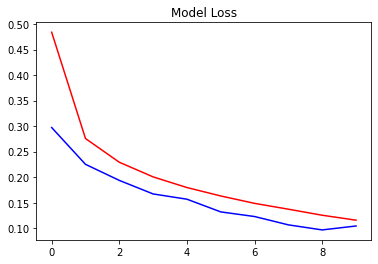

In [14]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.title('Model Loss')
plt.show()

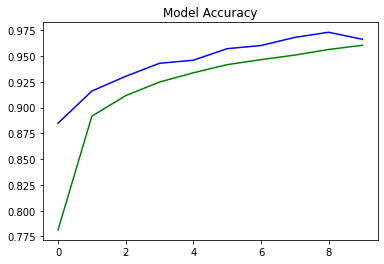

In [15]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='blue')
plt.title('Model Accuracy')
plt.show()

## Test The Model

In [31]:
test_review = ['I love the film and ther characters are amazing , it\'s not bad with great ideas',]

tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(test_review)

sequence = tokenizer.texts_to_sequences(test_review)

test_padded = pad_sequences(sequence)

predictions = model.predict(test_padded)

print('Positive') if predictions > 0.5 else print('Negative')

Positive
